<a href="https://colab.research.google.com/github/ChaesongYun/YT_Title_Predictor/blob/main/Youtube_Data_Cleaning_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YouTube Data Cleaning & Preprocessing

Data Cleaning
1. 비디오 아이디가 a_k-dCgubFo인 데이터들을 지운다
2. 중복된 비디오가 있는지 체크하고 지운다
3. 구독자 수가 0인 데이터들을 지운다

Data Processing
1. Metric 계산하기
- 조회수 나누기 구독자수
- 중앙값보다 크면 1 작으면 0
2. 제목 내 이모티콘 제거
3. 제목 내 숫자 제거
4. 데이터 추출

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re

# Data Cleaning
1. 비디오 아이디가 a_k-dCgubFo인 데이터들을 지운다
2. 중복된 비디오가 있는지 체크하고 지운다
3. 구독자수가 0인 데이터들을 지운다

In [23]:
# 데이터 가져오기
data_df = pd.read_csv("/content/drive/MyDrive/Youtube_Title_Predictor/Scraped_Data.csv", header=0, index_col=False)
data_df.head()

,Title,VideoID,ChannelID,ViewCount,LikeCount,SubscriberCount
0,아기에게 딱 달라붙어 육아 도와주는 강아지 ㅋㅋ,US03fZ0rwns,UCX2laRqGQhqoChYmlaUgOiw,136363,3807.0,776000
1,강아지가 잠도 안 자고 옆에 붙어있는 이유,GmtHOnDkzxA,UCnnwNnVjlCOKFJHIMG60kqg,16477,1011.0,294000
2,이사 하는 날은 짜장면! 강아지용 짜장면을 만들어 줬더니 밥그릇 엎고 난리가 났어요!,2RjaRrlLtTM,UC3PSZivQbIegrfavj4fmgQQ,196960,10605.0,2180000
3,하룻 강아지 범 무서운 줄 모른다더니 #속담 #호랑이 #개,cmR6B4jpFgo,UC-w9T_XrbjA0llxn23xXU-w,139424205,1808730.0,416000
4,나는 가끔.. 뭘 해도 용서되는 강아지가 되고 싶다..... [거부할 수 없는 강아...,iPwajsJ7Z8E,UC22go5LdQEw-iDuxFb4C0hw,842980,8274.0,4880000


In [24]:
# 구독자 수가 0인 데이터
data_df[data_df.SubscriberCount == 0]

# 조회수가 0인 데이터
data_df[data_df.ViewCount == 0]

# 중복된 데이터
data_df[data_df.VideoID.duplicated()]

,Title,VideoID,ChannelID,ViewCount,LikeCount,SubscriberCount
101,7일이나 호텔링했다고 따박따박 따지는 리트리버,OTaDIU40an4,UC-IYpdOqjkER7B6cnChwlhA,175234,6259.0,1020000
102,아이 향해 달려든 이웃집 개…&#39;반려견 셰퍼드&#39;가 한 행동 / JTBC...,ENcGwRD-NMA,UCFg8jw3ZIK50CW0G2P_13cA,253703,2315.0,249000
157,시츄,a_k-dCgubFo,UC2WIzGXv8BXUQTIQDXz6qYQ,4240945,260.0,131
163,뿅망치통후추_Shihtzu,a_k-dCgubFo,UClWq4AToEhAWdCJluem6h3A,4240945,260.0,14000
201,MochaMilk,a_k-dCgubFo,UCnjyiWHGEyww-p8QYSftx2A,4240898,260.0,1650000
...,...,...,...,...,...,...
970,진료는 관심없고 수의사샘만 노리는 강아지..,aGBdc5ZmYAM,UCeXxAet11DPbC8pG-lBOUTQ,295333,6628.0,574000
976,아리둥절 Ari the Corgi,a_k-dCgubFo,UCeXxAet11DPbC8pG-lBOUTQ,4240898,260.0,574000
978,8코기네 /8Corgi House,a_k-dCgubFo,UCenG5DES1t6SYGrgzGNzWzQ,4240898,260.0,385000
987,호두는웰시코기,a_k-dCgubFo,UCmNqkdtxBN5iq9TRmR1IVtg,4240898,260.0,210


In [25]:
data_df = data_df.drop(data_df[data_df.VideoID.duplicated()].index)
data_df = data_df.drop(data_df[data_df.VideoID == " a_k-dCgubFo"].index)
data_df = data_df.drop(data_df[data_df.SubscriberCount == 0].index)
data_df = data_df.drop(data_df[data_df.ViewCount ==  0].index)

data_df.shape

(880, 6)

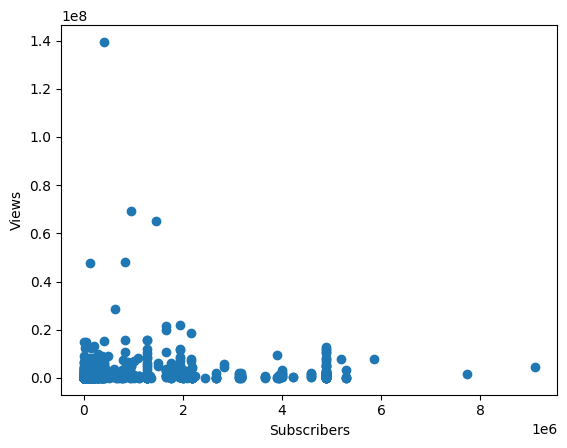

In [26]:
# 데이터 시각화: 구독자수 대비 조회수
plt.scatter(data_df.SubscriberCount, data_df.ViewCount)
plt.xlabel("Subscribers")
plt.ylabel("Views")
plt.show()

## Data Preprocessing(데이터 전처리)
1. Metric 계산하기
- ViewCount를 SubscriberCount로 나눈다
- 중앙값을 계산하고 중앙값보다 크면 1, 작으면 0으로 assgin한다
2. 이모티콘을 제거하낟
3. 데이터 추출

In [27]:
# Metric 계산하기
x_min = data_df.ViewCount.min()
x_max = data_df.ViewCount.max()

data_df["Views_to_Subs"] = data_df.ViewCount/ data_df.SubscriberCount
data_df.head()

,Title,VideoID,ChannelID,ViewCount,LikeCount,SubscriberCount,Views_to_Subs
0,아기에게 딱 달라붙어 육아 도와주는 강아지 ㅋㅋ,US03fZ0rwns,UCX2laRqGQhqoChYmlaUgOiw,136363,3807.0,776000,0.175726
1,강아지가 잠도 안 자고 옆에 붙어있는 이유,GmtHOnDkzxA,UCnnwNnVjlCOKFJHIMG60kqg,16477,1011.0,294000,0.056044
2,이사 하는 날은 짜장면! 강아지용 짜장면을 만들어 줬더니 밥그릇 엎고 난리가 났어요!,2RjaRrlLtTM,UC3PSZivQbIegrfavj4fmgQQ,196960,10605.0,2180000,0.090349
3,하룻 강아지 범 무서운 줄 모른다더니 #속담 #호랑이 #개,cmR6B4jpFgo,UC-w9T_XrbjA0llxn23xXU-w,139424205,1808730.0,416000,335.154339
4,나는 가끔.. 뭘 해도 용서되는 강아지가 되고 싶다..... [거부할 수 없는 강아...,iPwajsJ7Z8E,UC22go5LdQEw-iDuxFb4C0hw,842980,8274.0,4880000,0.172742


In [29]:
# 중앙값 찾기
views_median = data_df.Views_to_Subs.median()


In [28]:
# Target(Label) 저장하기
def make_target(data, median):
  target = []
  for ratio in data:
    if ratio > median:
      target.append(1)
    else:
      target.append(0)
  return target

target = make_target(data_df.Views_to_Subs, views_median)

In [30]:
data_df["Target"] = target
data_df.Target.value_counts()

0    440
1    440
Name: Target, dtype: int64

In [37]:
def process_titles(titles):
  processed_titles = []

  for title in titles:
    sample_title = re.compile('[ㄱ-ㅎ가-힣a-zA-Z0-9]+').findall(title)
    sample_title = " ".join(sample_title)
    processed_titles.append(sample_title)
  return processed_titles

cleaned_titles = process_titles(data_df.Title)
data_df["Cleaned_Titles"] = cleaned_titles
data_df.head()

,Title,VideoID,ChannelID,ViewCount,LikeCount,SubscriberCount,Views_to_Subs,Target,Cleaned_Titles
0,아기에게 딱 달라붙어 육아 도와주는 강아지 ㅋㅋ,US03fZ0rwns,UCX2laRqGQhqoChYmlaUgOiw,136363,3807.0,776000,0.175726,0,아기에게 딱 달라붙어 육아 도와주는 강아지 ㅋㅋ
1,강아지가 잠도 안 자고 옆에 붙어있는 이유,GmtHOnDkzxA,UCnnwNnVjlCOKFJHIMG60kqg,16477,1011.0,294000,0.056044,0,강아지가 잠도 안 자고 옆에 붙어있는 이유
2,이사 하는 날은 짜장면! 강아지용 짜장면을 만들어 줬더니 밥그릇 엎고 난리가 났어요!,2RjaRrlLtTM,UC3PSZivQbIegrfavj4fmgQQ,196960,10605.0,2180000,0.090349,0,이사 하는 날은 짜장면 강아지용 짜장면을 만들어 줬더니 밥그릇 엎고 난리가 났어요
3,하룻 강아지 범 무서운 줄 모른다더니 #속담 #호랑이 #개,cmR6B4jpFgo,UC-w9T_XrbjA0llxn23xXU-w,139424205,1808730.0,416000,335.154339,1,하룻 강아지 범 무서운 줄 모른다더니 속담 호랑이 개
4,나는 가끔.. 뭘 해도 용서되는 강아지가 되고 싶다..... [거부할 수 없는 강아...,iPwajsJ7Z8E,UC22go5LdQEw-iDuxFb4C0hw,842980,8274.0,4880000,0.172742,0,나는 가끔 뭘 해도 용서되는 강아지가 되고 싶다 거부할 수 없는 강아지들 몰아보기 ...


In [38]:
# 데이터 출력
cleaned_data = pd.DataFrame({'Title': data_df.Cleaned_Titles, 'Target': data_df.Target})
cleaned_data.to_csv('/content/drive/MyDrive/Youtube_Title_Predictor/cleaned_data.csv', index=False)